# Counting bikes in Zurich

All around the city of Zurich there are bike counting stations. They count the number of bikes in each direction at their location. We can get these counts for each 15minute period of the last few years. 

In this notebook we will look at how the total number of cyclists varies across the year and what the distribution of cyclists looks like on an average day.

The year 2017 is not over yet, so we will use data from 2016 instead.

To get started we import a few libraries that we will need later:

## Usage

This is a jupyter notebook, where you can have text "cells" (like this text here) and code "cells" i.e. boxes where you can write python code to be executed (like the one below). For a short introduction to python and jupyter read the [quick start guide](introduction.ipynb).

<div style="background: #efffed;
            border: 1px solid grey;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
    <i class="fa-play fa" 
       style="font-size: 40px;
              line-height: 40px;
              margin: 8px;
              color: #444;">
    </i>
    <div>
    To run the selected code cell, press <pre style="background: #efffed">Shift + Enter</pre>
    </div>
</div>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from utils import get_velo_data

# Fetch and load data

Fetch the data from the city of Zurich server and load it into a [pandas](http://pandas.pydata.org/) dataframe. We can think of a pandas dataframe as an Excel spreadsheet that can be manipulated by programming instead of clicking buttons.

There are two things we need to know in order to load the data:
1. which year we are interested in, in our case 2016
1. which of the many bike counters we want to look at

The bike counters are specified with their own special naming system. This means their names are things like "ECO09113499" or "U15G3104442". Not exactly human friendly. It makes sense though as the counters themselves have been in use for many years during which they might have been moved from one location to another. We will focus on a counter that has been placed at Mythenquai for a long time. It is named: "ECO09113499". To find out what counters at other locations are called visit: XXX and check when they were located where.

Now that we know the name of the counter and the time period, let's finally load the data (if it looks like nothing is happening it is because this can take a while to fetch the data).

In [2]:
mythenquai = get_velo_data('ECO09113499', year=2016)

To see what our data looks like we can examine the first five rows of it using:

In [3]:
mythenquai.head(5)

,Velo_in,Velo_out,Total
Datum,,,
2016-01-22 20:00:00,2.0,1.0,3.0
2016-01-06 00:00:00,0.0,0.0,0.0
2016-01-06 00:15:00,0.0,2.0,2.0
2016-01-06 00:30:00,0.0,0.0,0.0
2016-01-06 00:45:00,0.0,0.0,0.0


You can probably see why it makes sense to think of dataframes as excel spreadsheets. They both have rows and columns. In this dataset each row is one 15minute period. The columns "Velo_in" and "Velo_out" are the number of bikes that went in each direction. For this particular counter "Velo_in" counts how many bikes are going north, or towards the city center of Zurich. "Velo_out" counts the bikes going south. The column "Total" shows the sum of the two other columns.

To make it a bit easier to think about our data let's rename the first two columns to: "North" and "South":

In [4]:
# rename for easier plotting
mythenquai.columns = ["North", "South", "Total"]
mythenquai.head(5)

,North,South,Total
Datum,,,
2016-01-22 20:00:00,2.0,1.0,3.0
2016-01-06 00:00:00,0.0,0.0,0.0
2016-01-06 00:15:00,0.0,2.0,2.0
2016-01-06 00:30:00,0.0,0.0,0.0
2016-01-06 00:45:00,0.0,0.0,0.0


Now that we have the data, let's find out when people cycle past Mythenquai!

# Bike users per week

To get started let's look at the total number of bikes that go north and south each week. As our data gives the number of bikes counted in each 15m period we need to sum those in the same week to get the total count for a day. In pandas you can do this with the `resample` function which combines entries according to the rule you specify as the argument. For weekly use 'W', for daily use 'D', and for hourly use 'H', etc. Once that is done, plotting is easy: we call the `plot` function of the dataframe.

In [5]:
weekly = mythenquai.resample('W').sum()

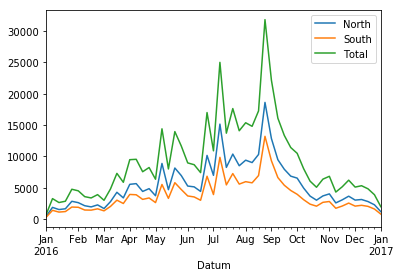

In [6]:
weekly.plot();

---

#### Challenge

Can you modify the example above from showing results per Week to instead showing the number of cyclists per Day?

In [ ]:
# what needs to be on the right of the eqaul sign on the next line?
# check the weekly example above for inspiration
daily = 
daily.plot();

---

We can see that the total number of cyclists increases over the months, presumably as the weather gets better. Then after some time in September it drops back down as autumn approaches. There seems to be a pattern of a week with more cyclists followed by a low one which repeats. It would be interesting to look at what causes this.


As an exercise let's make the same plot but showing aggregates for each month instead of each week:

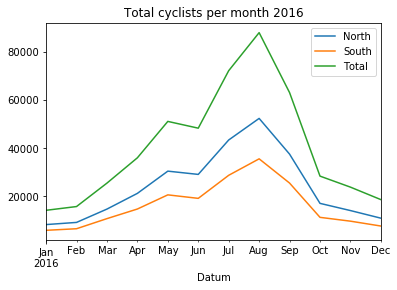

In [7]:
mythenquai.resample('M').sum().plot()
plt.title("Total cyclists per month 2016");

## Average cyclists per hour

A further question that is interesting is: do people commute to work (and when) or do they only cycle for fun? One way to look at this is to calculate the average number of cyclists per hour of the day. If people commute to work we should see a spike early in the morning and in the afternoon. Corresponding to people going to work and returning home. If they only cycle for fun, the distribution would probably be smoother.

To do this we compute the number of cyclists per hour, just as we did before. Then we group each hour together by averaging them. This means the hour from 8am - 9am of every day of the year get's averegaged together and then plotted:

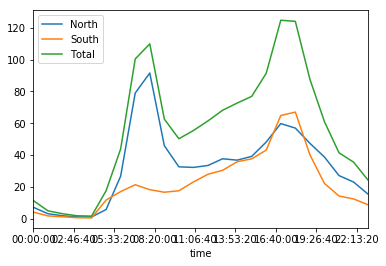

In [8]:
hourly = mythenquai.resample('H').sum()
hourly.groupby(hourly.index.time).mean().plot();

As we suspected there is a big bump of people going North (blue) in the morning and a smaller bump of people going South (orange) around five in the afternoon. However there is also a significant number of people cycling at the hours inbetween. How can we learn more about that trend across the day?

The pattern made by the commuters should only exist for working days. If we split up working days (Monday to Friday) and the weekend (Saturday and Sunday) we might learn something more.

The first step to check this idea is to select only measurements that were taken on a Saturday or Sunday. We can do that using the following bit of code:

In [9]:
import numpy as np

weekend = mythenquai[np.logical_or(mythenquai.index.weekday_name == 'Saturday',
                                   mythenquai.index.weekday_name == 'Sunday')]
# select five random entries, if you check the dates in a calendar you will see they
# are all on the weekend
weekend.sample(5)

,North,South,Total
Datum,,,
2016-09-04 14:15:00,10.0,13.0,23.0
2016-03-13 01:00:00,0.0,0.0,0.0
2016-03-26 09:15:00,2.0,6.0,8.0
2016-06-19 01:45:00,0.0,0.0,0.0
2016-06-25 21:30:00,1.0,1.0,2.0


Next we sum the counts within the same hour of the day, and then we average. Just as before.

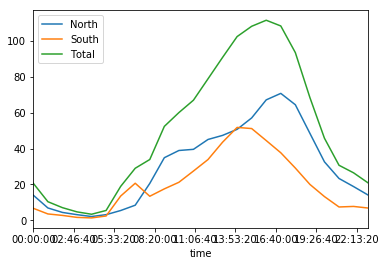

In [10]:
weekend = weekend.resample('H').sum()

weekend.groupby(weekend.index.time).mean().plot();

---

#### Challenge

Based on the weekend example, can you show what the distribution of cyclists looks like during the working week?